<a href="https://colab.research.google.com/github/eyeshoe/EV-Data-Processing/blob/main/orange_county_truck_volumes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import geopandas as gpd

In [3]:
# read in files
oc_land_use = gpd.read_file('OC_Land_Use_2016.shp')
oc_land_use

ERROR:fiona._env:fread(636) failed on DBF file.


,OBJECTID,SCAGUID16,SCAGUID12,APN,COUNTY,COUNTY_ID,CITY,CITY_ID,CITY_GP_CO,SCAG_GP_CO,...,SCAG_ZN_CO,ZN12_CITY,LU16,LU12,ACRES,YEAR,NOTES,Shape__Are,Shape__Len,geometry
0,1,0590550003,0590550003,639-131-11,Orange,59,Aliso Viejo,947,CF,1240,...,1240,CF,1265,1265,2.987989,2016,None,12091.963379,622.662235,"POLYGON Z ((-117.73720 33.55192 0.00000, -117...."
1,2,0590550006,0590550006,639-131-14,Orange,59,Aliso Viejo,947,CF,1240,...,1240,CF,1265,1265,0.999773,2016,None,4045.938843,346.860303,"POLYGON Z ((-117.73718 33.55365 0.00000, -117...."
2,3,0590544450,0590544450,632-354-03,Orange,59,Aliso Viejo,947,LDR,1110,...,1110,RL,1110,1110,0.160793,2016,None,650.705688,100.781296,"POLYGON Z ((-117.73707 33.55995 0.00000, -117...."
3,4,0590544392,0590544392,632-352-02,Orange,59,Aliso Viejo,947,OS,1800,...,1850,OS,1800,1800,5.267097,2016,None,21315.184937,664.125433,"POLYGON Z ((-117.73764 33.56006 0.00000, -117...."
4,5,0590544449,0590544449,632-354-02,Orange,59,Aliso Viejo,947,LDR,1110,...,1110,RL,1110,1110,0.168055,2016,None,680.096069,103.198066,"POLYGON Z ((-117.73725 33.56010 0.00000, -117...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34616,34617,0590267283,0590267283,234-111-07,Orange,59,Anaheim,2000,I-L,1300,...,1300,I,1300,1300,0.357785,2016,None,1447.905396,152.966172,"POLYGON Z ((-117.89961 33.82459 0.00000, -117...."
34617,34618,0590049129,0590049129,037-231-20,Orange,59,Anaheim,2000,R-M,1120,...,1120,RM-4,1122,1122,0.252619,2016,None,1022.311401,130.071171,"POLYGON Z ((-117.90394 33.82494 0.00000, -117...."
34618,34619,0590049128,0590049128,037-231-19,Orange,59,Anaheim,2000,R-M,1120,...,1120,RM-4,1120,1120,0.142618,2016,None,577.152832,103.160717,"POLYGON Z ((-117.90367 33.82468 0.00000, -117...."
34619,34620,0590266685,0590266685,234-012-03,Orange,59,Anaheim,2000,R-LM,1140,...,1120,RM-2,1123,1123,0.093115,2016,None,376.821899,82.387919,"POLYGON Z ((-117.89770 33.82496 0.00000, -117...."


SCAGUID16: Unique Indentifcation Number of the Block
SCAG_GP_CO: 2016 SCAG general plan land use code
1300 = industrial
geometry = all relevant to eventually calculate centroid and area


In [17]:
# keep only relevant columns
oc_land_use = oc_land_use[['SCAGUID16', 'SCAG_GP_CO', 'geometry']]

# set SCAGUID16 as index
oc_land_use.set_index('SCAGUID16')


,SCAG_GP_CO,geometry
SCAGUID16,,
0590550003,1240,"POLYGON Z ((-117.73720 33.55192 0.00000, -117...."
0590550006,1240,"POLYGON Z ((-117.73718 33.55365 0.00000, -117...."
0590544450,1110,"POLYGON Z ((-117.73707 33.55995 0.00000, -117...."
0590544392,1800,"POLYGON Z ((-117.73764 33.56006 0.00000, -117...."
0590544449,1110,"POLYGON Z ((-117.73725 33.56010 0.00000, -117...."
...,...,...
0590267283,1300,"POLYGON Z ((-117.89961 33.82459 0.00000, -117...."
0590049129,1120,"POLYGON Z ((-117.90394 33.82494 0.00000, -117...."
0590049128,1120,"POLYGON Z ((-117.90367 33.82468 0.00000, -117...."


In [21]:
# filter so we only see industrial blocks
# where SCAG_GP_CO = 1300
oc_industrial = oc_land_use[oc_land_use['SCAG_GP_CO'] == '1300']
oc_industrial = oc_industrial.set_index('SCAGUID16')
oc_industrial

,SCAG_GP_CO,geometry
SCAGUID16,,
0590086606,1300,"POLYGON Z ((-117.90136 33.80527 0.00000, -117...."
0590086605,1300,"POLYGON Z ((-117.90136 33.80570 0.00000, -117...."
0590086573,1300,"POLYGON Z ((-117.90228 33.80570 0.00000, -117...."
0590086604,1300,"POLYGON Z ((-117.90136 33.80612 0.00000, -117...."
0590086591,1300,"POLYGON Z ((-117.89808 33.80621 0.00000, -117...."
...,...,...
0590267289,1300,"POLYGON Z ((-117.89828 33.82433 0.00000, -117...."
0590267284,1300,"POLYGON Z ((-117.90034 33.82447 0.00000, -117...."
0590267303,1300,"POLYGON Z ((-117.90148 33.82176 0.00000, -117...."


Calculate centroid and area for each industrial block ( polygon)

Projecting into World Mercator CRS (ESPG:3395)
(World Mercator),
- cylindrical map projection
- uses meters as units


In [22]:

# reproject geometries to a projected CRS (e.g., EPSG:3395 - World Mercator)
oc_industrial = oc_industrial.to_crs(epsg=3395)

# calculate the centroid for each polygon
oc_industrial['centroid'] = oc_industrial.geometry.centroid

# calclulate area for each polygon
oc_industrial['area'] = oc_industrial.geometry.area

# reproject back to the original CRS
oc_industrial = oc_industrial.to_crs(oc_land_use.crs)

oc_industrial


,SCAG_GP_CO,geometry,centroid,area
SCAGUID16,,,,
0590086606,1300,"POLYGON Z ((-117.90136 33.80527 0.00000, -117....",POINT (-13124765.864 3978852.366),12038.616910
0590086605,1300,"POLYGON Z ((-117.90136 33.80570 0.00000, -117....",POINT (-13124770.231 3978941.227),5849.150054
0590086573,1300,"POLYGON Z ((-117.90228 33.80570 0.00000, -117....",POINT (-13124850.714 3978906.964),7083.275164
0590086604,1300,"POLYGON Z ((-117.90136 33.80612 0.00000, -117....",POINT (-13124770.464 3978997.715),5688.107179
0590086591,1300,"POLYGON Z ((-117.89808 33.80621 0.00000, -117....",POINT (-13124453.842 3978983.208),22360.414576
...,...,...,...,...
0590267289,1300,"POLYGON Z ((-117.89828 33.82433 0.00000, -117....",POINT (-13124408.010 3981471.603),2547.151285
0590267284,1300,"POLYGON Z ((-117.90034 33.82447 0.00000, -117....",POINT (-13124631.264 3981481.196),2367.613146
0590267303,1300,"POLYGON Z ((-117.90148 33.82176 0.00000, -117....",POINT (-13124871.289 3981291.824),71030.897116


calculating truck volumes for each block

fractional area of the block * total truck volume

In [23]:

total_truck_volume = 10000  # hard coded value -- will replace later with actual value once I find it

# sum the total area of all industrial blocks
total_area = oc_industrial['area'].sum()

# Distribute the total truck volume proportionally based on the area of each block
oc_industrial['truck_volume'] = (oc_industrial['area'] / total_area) * total_truck_volume

oc_industrial


,SCAG_GP_CO,geometry,centroid,area,truck_volume
SCAGUID16,,,,,
0590086606,1300,"POLYGON Z ((-117.90136 33.80527 0.00000, -117....",POINT (-13124765.864 3978852.366),12038.616910,24.833688
0590086605,1300,"POLYGON Z ((-117.90136 33.80570 0.00000, -117....",POINT (-13124770.231 3978941.227),5849.150054,12.065835
0590086573,1300,"POLYGON Z ((-117.90228 33.80570 0.00000, -117....",POINT (-13124850.714 3978906.964),7083.275164,14.611632
0590086604,1300,"POLYGON Z ((-117.90136 33.80612 0.00000, -117....",POINT (-13124770.464 3978997.715),5688.107179,11.733630
0590086591,1300,"POLYGON Z ((-117.89808 33.80621 0.00000, -117....",POINT (-13124453.842 3978983.208),22360.414576,46.125860
...,...,...,...,...,...
0590267289,1300,"POLYGON Z ((-117.89828 33.82433 0.00000, -117....",POINT (-13124408.010 3981471.603),2547.151285,5.254354
0590267284,1300,"POLYGON Z ((-117.90034 33.82447 0.00000, -117....",POINT (-13124631.264 3981481.196),2367.613146,4.883997
0590267303,1300,"POLYGON Z ((-117.90148 33.82176 0.00000, -117....",POINT (-13124871.289 3981291.824),71030.897116,146.525065


building distance matrix

In [24]:
from scipy.spatial import distance_matrix
import numpy as np

In [32]:
# extract centroid coordinates
centroid_coords = np.array(list(oc_industrial['centroid'].apply(lambda geom: (geom.x, geom.y))))

# compute the distance matrix
dist_matrix = distance_matrix(centroid_coords, centroid_coords)

# convert the distance matrix to a DataFrame
dist_matrix_df = pd.DataFrame(dist_matrix, index=oc_industrial.index, columns=oc_industrial.index)


dist_matrix_df

SCAGUID16,0590086606,0590086605,0590086573,0590086604,0590086591,0590086603,0590086602,0590086675,0590086574,0590086595,...,0590267286,0590267287,0590267293,0590267302,0590267288,0590267289,0590267284,0590267303,0590668290,0590267283
SCAGUID16,,,,,,,,,,,,,,,,,,,,,
0590086606,0.000000,88.968550,100.897910,145.422127,338.345323,195.244231,236.363670,1327.847258,192.357407,176.270905,...,2580.122608,2595.403670,2570.613586,2371.266334,2617.997422,2643.570392,2632.273538,2441.735549,2650.935819,2663.495976
0590086605,88.968550,0.000000,87.471880,56.488536,319.162174,106.324647,147.439193,1318.564207,131.743399,143.124056,...,2491.869644,2507.327487,2481.823934,2282.391732,2530.227211,2556.170488,2543.767371,2352.768614,2562.576934,2575.300928
0590086573,100.897910,87.471880,0.000000,121.143353,404.128710,161.775520,198.174500,1402.784347,101.373737,228.925124,...,2533.643743,2550.238962,2508.139922,2310.292045,2574.849780,2602.567794,2583.568348,2384.948819,2603.553634,2617.422288
0590086604,145.422127,56.488536,121.143353,0.000000,316.953950,49.836110,90.951860,1313.224495,116.990878,145.800512,...,2435.585725,2451.123349,2425.681812,2226.147245,2474.169358,2500.298982,2487.378595,2296.323744,2506.247166,2519.042143
0590086591,338.345323,319.162174,404.128710,316.953950,0.000000,323.296647,334.793463,999.431261,433.936816,176.102517,...,2444.715491,2455.254996,2496.475030,2293.204730,2470.701059,2488.817081,2504.280339,2346.054189,2518.044369,2525.879564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0590267289,2643.570392,2556.170488,2602.567794,2500.298982,2488.817081,2451.031052,2410.521137,2554.320663,2516.221898,2518.092635,...,169.454661,128.727349,646.920896,635.797639,66.604774,0.000000,223.459676,496.938059,184.703554,147.659682
0590267284,2632.273538,2543.767371,2583.568348,2487.378595,2504.280339,2437.634464,2396.647623,2653.822233,2492.919473,2517.987561,...,82.346679,108.515301,426.927150,446.948789,161.396048,223.459676,0.000000,305.734230,43.552753,84.075228
0590267303,2441.735549,2352.768614,2384.948819,2296.323744,2346.054189,2246.527892,2205.418834,2606.876509,2290.412013,2341.206126,...,328.575526,369.073491,214.062791,141.510319,430.719065,496.938059,305.734230,0.000000,347.759067,385.711877


In [28]:
# save the distance matrix as csv for later use
dist_matrix_df.to_csv('oc_distance_matrix.csv', index=True)


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

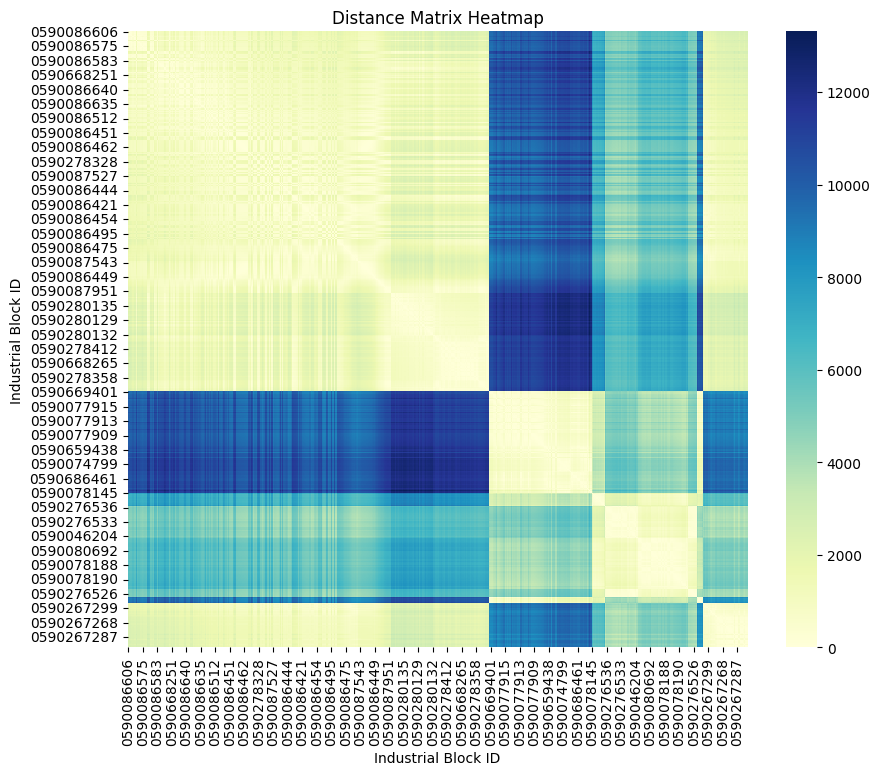

In [34]:
plt.figure(figsize=(10, 8))

# create the heatmap
sns.heatmap(dist_matrix_df, cmap="YlGnBu", annot=False)
plt.title("Distance Matrix Heatmap")
plt.xlabel("Industrial Block ID")
plt.ylabel("Industrial Block ID")

# Display the plot
plt.show()